In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')

In [46]:
# Load CSV data
df = pd.read_csv("Sales_Ecommerce_Data.csv")
df.head()

,order_id,order_date,product,category,quantity,price,region
0,151,02-01-2026,Laptop,NaN,NaN,800.0,South
1,192,15-01-2026,Headphones,NaN,1.0,100.0,North
2,114,08-01-2026,Laptop,NaN,NaN,0.0,West
3,171,08-01-2026,Unknown,NaN,1.0,NaN,North
4,160,17-01-2026,Charger,Electronics,NaN,300.0,East


In [139]:
# Inspect missing values & duplicates
print("Missing values per column:\n",df.isnull().sum())
print("Duplicate order_ids:", df.duplicated(subset=["order_id"]).sum())
df.dtypes

Missing values per column:
 order_id       0
order_date     0
product        0
category       0
quantity       0
price          0
region         0
total_sales    0
dtype: int64
Duplicate order_ids: 0


order_id         int64
order_date      object
product         object
category        object
quantity       float64
price          float64
region          object
total_sales    float64
dtype: object

In [54]:
#Remove duplicate orders
df = df.drop_duplicates(subset=["order_id"])
df.duplicated(subset=["order_id"]).sum()

np.int64(0)

In [166]:
# Handle missing values
df["quantity"] = df["quantity"].fillna(1)
df["product"] = df["product"].replace("Unknown","Misc")
df["category"] = df["category"].fillna("Unknown")
df["region"] = df["region"].fillna("Unknown")

avg_price = df[df["price"] > 0]["price"].mean()
df["price"] = df["price"].fillna(avg_price)
df.loc[df["price"] <= 0, "price"] = avg_price
df["price"] = df["price"].round(2)

df.reset_index()
df

,order_id,order_date,product,category,quantity,price,region,total_sales
0,151,02-01-2026,Laptop,Unknown,1.0,800.00,South,800.00
1,192,15-01-2026,Headphones,Unknown,1.0,100.00,North,100.00
2,114,08-01-2026,Laptop,Unknown,1.0,402.52,West,402.52
3,171,08-01-2026,Misc,Unknown,1.0,354.22,North,354.22
4,160,17-01-2026,Charger,Electronics,1.0,300.00,East,300.00
...,...,...,...,...,...,...,...,...
264,166,08-01-2026,Charger,Electronics,2.0,500.00,West,1000.00
281,130,11-01-2026,Laptop,Unknown,1.0,500.00,West,500.00
315,124,23-01-2026,Charger,Electronics,1.0,800.00,South,800.00
370,145,18-01-2026,Phone,Electronics,3.0,402.52,North,1207.56


In [157]:
# Total sale
df["total_sales"] = df["quantity"] * df["price"]
df

,order_id,order_date,product,category,quantity,price,region,total_sales
0,151,02-01-2026,Laptop,Unknown,1.0,800.00,South,800.00
1,192,15-01-2026,Headphones,Unknown,1.0,100.00,North,100.00
2,114,08-01-2026,Laptop,Unknown,1.0,402.52,West,402.52
3,171,08-01-2026,Misc,Unknown,1.0,354.22,North,354.22
4,160,17-01-2026,Charger,Electronics,1.0,300.00,East,300.00
...,...,...,...,...,...,...,...,...
264,166,08-01-2026,Charger,Electronics,2.0,500.00,West,1000.00
281,130,11-01-2026,Laptop,Unknown,1.0,500.00,West,500.00
315,124,23-01-2026,Charger,Electronics,1.0,800.00,South,800.00
370,145,18-01-2026,Phone,Electronics,3.0,402.52,North,1207.56


In [158]:
# Basic analysis
# 1. total sales per product
product_sales = df.groupby("product")["total_sales"].sum().reset_index().sort_values("total_sales", ascending=False).round(2)
product_sales.head()

,product,total_sales
1,Headphones,13695.54
0,Charger,11632.88
2,Laptop,10119.40
3,Misc,9934.52
4,Phone,9280.30


In [159]:
# 2. total sales per region
region_sales = df.groupby("region")["total_sales"].sum().reset_index().sort_values("total_sales", ascending=False).round(2)
region_sales

,region,total_sales
1,North,15988.74
3,Unknown,14638.80
4,West,12977.78
0,East,9094.66
2,South,8073.62


In [161]:
# 3. top product per region
top_product_region = df.groupby(["region","product"])["total_sales"].sum().reset_index()
top_product_region = top_product_region.sort_values(["region","total_sales"], ascending=[True, False]).round(2)

top_per_region = top_product_region.groupby("region").head(1)
top_per_region

,region,product,total_sales
0,East,Charger,2567.70
7,North,Headphones,6708.44
13,South,Laptop,4208.44
19,Unknown,Misc,3308.44
27,West,Tablet,3010.96


In [162]:
# Advance analysis
top_3_products = product_sales.head(3)
avg_order_region = df.groupby("region")["total_sales"].mean().reset_index().sort_values("total_sales", ascending=False).round(2)

print("Top 3 Products Overall:\n", top_3_products)
print("\nAverage Order Value per Region:\n", avg_order_region)

Top 3 Products Overall:
       product  total_sales
1  Headphones     13695.54
0     Charger     11632.88
2      Laptop     10119.40

Average Order Value per Region:
     region  total_sales
1    North       726.76
3  Unknown       636.47
4     West       564.25
2    South       538.24
0     East       534.98


In [163]:
# Export clean & summary CSV
df.to_csv("cleaned_sales_data_1000.csv", index=False)
product_sales.to_csv("product_sales_summary.csv", index=False)
region_sales.to_csv("region_sales_summary.csv", index=False)
top_per_region.to_csv("top_product_per_region.csv", index=False)
avg_order_region.to_csv("avg_order_per_region.csv", index=False)

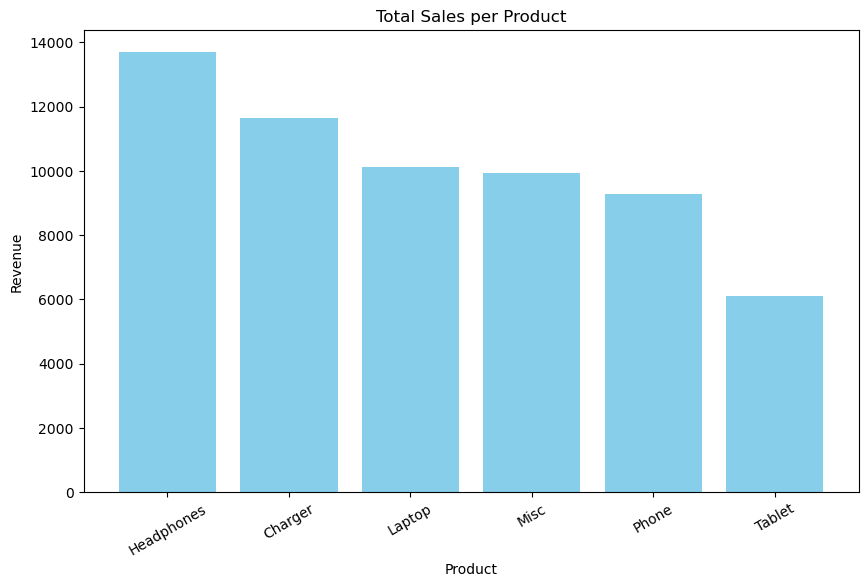

In [145]:
# Visualization Bar chart
plt.figure(figsize=(10,6))
plt.bar(product_sales["product"], product_sales["total_sales"], color="skyblue")
plt.title("Total Sales per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.show()

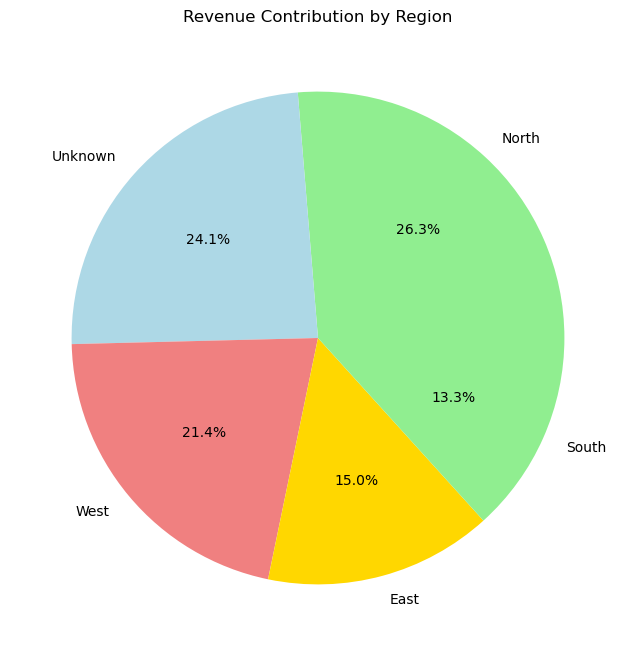

In [147]:
# Visualization Pie chart
plt.figure(figsize=(8,8))
plt.pie(region_sales["total_sales"], labels=region_sales["region"], autopct="%1.1f%%", colors=["lightgreen","lightblue","lightcoral","gold"])
plt.title("Revenue Contribution by Region")
plt.show()

In [164]:
# Data cleaning report
print("----------Data Cleaning Report----------")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("Missing Values After Cleaning:\n", df.isnull().sum())
print("Duplicate Orders After Cleaning:", df.duplicated(subset=["order_id"]).sum())

----------Data Cleaning Report----------
Total Rows: 100
Total Columns: 8
Missing Values After Cleaning:
 order_id       0
order_date     0
product        0
category       0
quantity       0
price          0
region         0
total_sales    0
dtype: int64
Duplicate Orders After Cleaning: 0


In [173]:
# Save final project
df.to_csv("final_cleaned_sales_data_1000.csv", index=False)
print("Project Completed! All cleaned data and summary CSVs saved.")

Project Completed! All cleaned data and summary CSVs saved.
